# Basic Plotting with matplotlib

You can show matplotlib figures directly in the notebook by using the `%matplotlib notebook` and `%matplotlib inline` magic commands. 

`%matplotlib notebook` provides an interactive environment.

In [29]:
%matplotlib notebook

In [30]:
import matplotlib as mpl
mpl.get_backend()

'nbAgg'

In [31]:
import matplotlib.pyplot as plt
plt.plot?

<IPython.core.display.Javascript object>


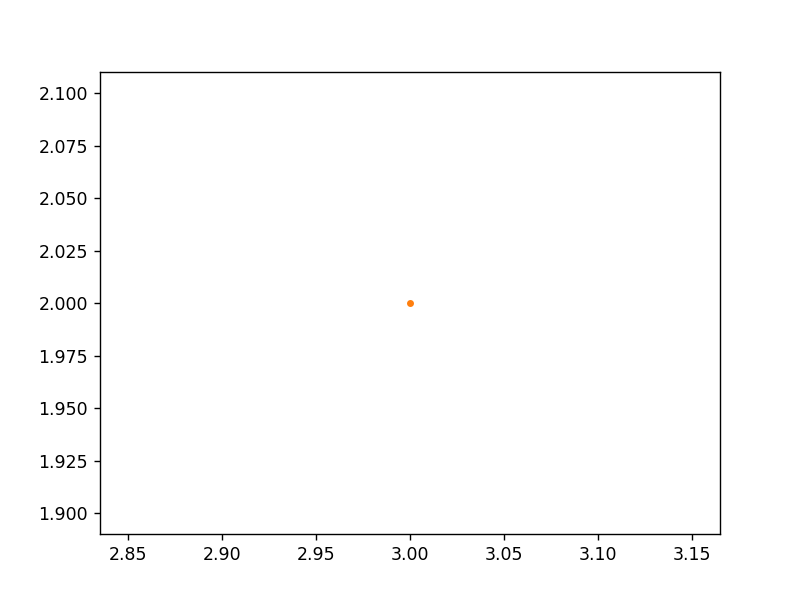

In [32]:
# because the default is the line style '-', 
# nothing will be shown if we only pass in one point (3,2)
plt.plot(3, 2)

In [33]:
# we can pass in '.' to plt.plot to indicate that we want
# the point (3,2) to be indicated with a marker '.'
plt.plot(3, 2, '.')

Let's see how to make a plot without using the scripting layer.

In [34]:
# First let's set the backend without using mpl.use() from the scripting layer
from matplotlib.backends.backend_agg import FigureCanvasAgg
from matplotlib.figure import Figure

# create a new figure
fig = Figure()

# associate fig with the backend
canvas = FigureCanvasAgg(fig)

# add a subplot to the fig
ax = fig.add_subplot(111)

# plot the point (3,2)
ax.plot(3, 2, '.')

# save the figure to test.png
canvas.print_png('test.png')

We can use html cell magic to display the image.

In [35]:
%%html
<img src='test.png' />

<IPython.core.display.Javascript object>


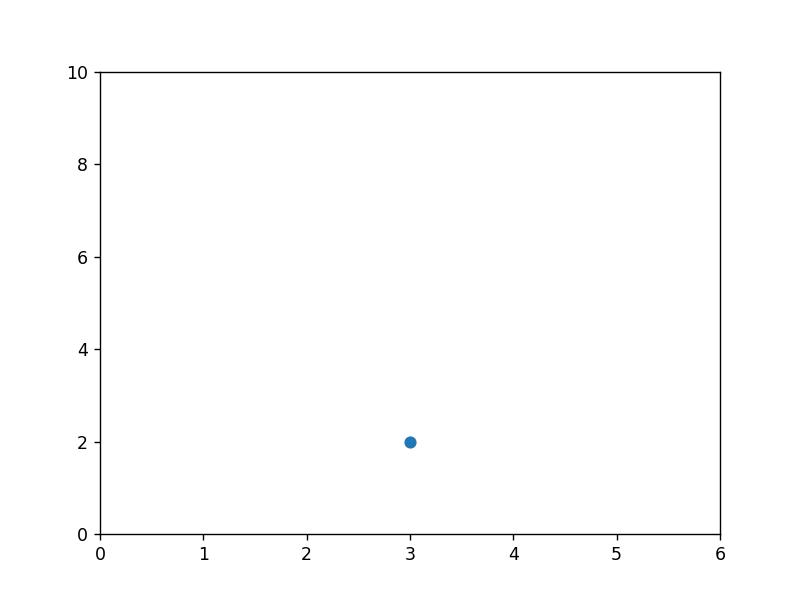

[0, 6, 0, 10]

In [36]:
# create a new figure
plt.figure()

# plot the point (3,2) using the circle marker
plt.plot(3, 2, 'o')

# get the current axes
ax = plt.gca()

# Set axis properties [xmin, xmax, ymin, ymax]
ax.axis([0,6,0,10])

<IPython.core.display.Javascript object>


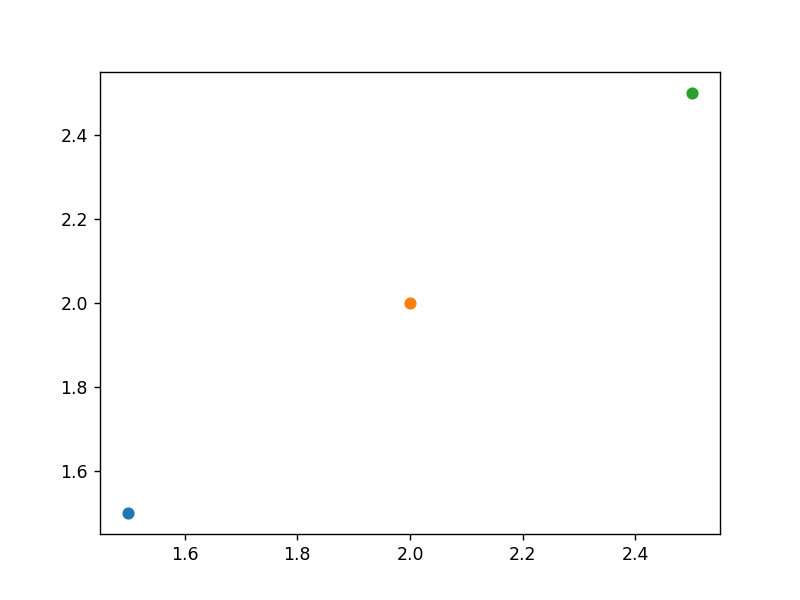

In [37]:
# create a new figure
plt.figure()

# plot the point (1.5, 1.5) using the circle marker
plt.plot(1.5, 1.5, 'o')
# plot the point (2, 2) using the circle marker
plt.plot(2, 2, 'o')
# plot the point (2.5, 2.5) using the circle marker
plt.plot(2.5, 2.5, 'o')

In [38]:
# get current axes
ax = plt.gca()
# get all the child objects the axes contains
ax.get_children()

# Scatterplots

<IPython.core.display.Javascript object>


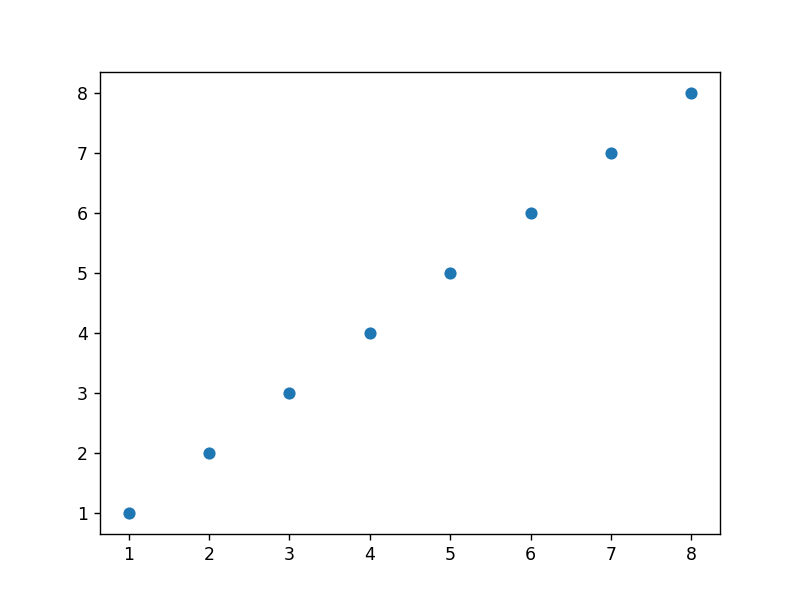

In [39]:
import numpy as np

x = np.array([1,2,3,4,5,6,7,8])
y = x

plt.figure()
plt.scatter(x, y) # similar to plt.plot(x, y, '.'), but the underlying child objects in the axes are not Line2D

<IPython.core.display.Javascript object>


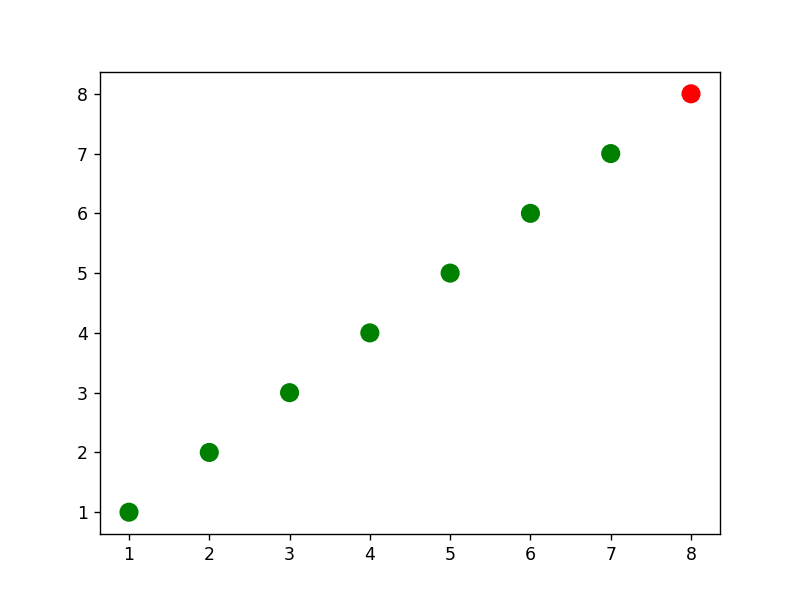

In [40]:
import numpy as np

x = np.array([1,2,3,4,5,6,7,8])
y = x

# create a list of colors for each point to have
# ['green', 'green', 'green', 'green', 'green', 'green', 'green', 'red']
colors = ['green']*(len(x)-1)
colors.append('red')

plt.figure()

# plot the point with size 100 and chosen colors
plt.scatter(x, y, s=100, c=colors)

In [41]:
# convert the two lists into a list of pairwise tuples
zip_generator = zip([1,2,3,4,5], [6,7,8,9,10])

print(list(zip_generator))
# the above prints:
# [(1, 6), (2, 7), (3, 8), (4, 9), (5, 10)]

zip_generator = zip([1,2,3,4,5], [6,7,8,9,10])
# The single star * unpacks a collection into positional arguments
print(*zip_generator)
# the above prints:
# (1, 6) (2, 7) (3, 8) (4, 9) (5, 10)

[(1, 6), (2, 7), (3, 8), (4, 9), (5, 10)]
(1, 6) (2, 7) (3, 8) (4, 9) (5, 10)


In [42]:
# use zip to convert 5 tuples with 2 elements each to 2 tuples with 5 elements each
print(list(zip((1, 6), (2, 7), (3, 8), (4, 9), (5, 10))))
# the above prints:
# [(1, 2, 3, 4, 5), (6, 7, 8, 9, 10)]


zip_generator = zip([1,2,3,4,5], [6,7,8,9,10])
# let's turn the data back into 2 lists
x, y = zip(*zip_generator) # This is like calling zip((1, 6), (2, 7), (3, 8), (4, 9), (5, 10))
print(x)
print(y)
# the above prints:
# (1, 2, 3, 4, 5)
# (6, 7, 8, 9, 10)

[(1, 2, 3, 4, 5), (6, 7, 8, 9, 10)]
(1, 2, 3, 4, 5)
(6, 7, 8, 9, 10)


<IPython.core.display.Javascript object>


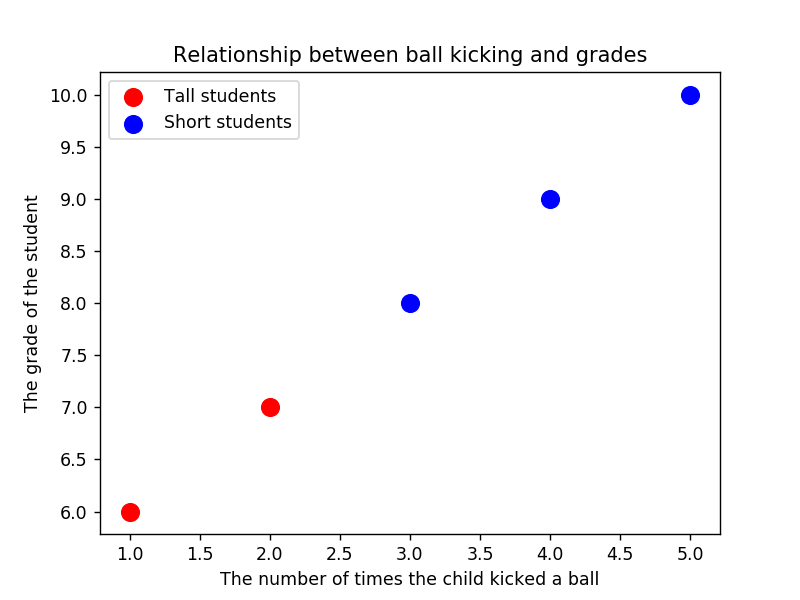

In [43]:
plt.figure()
# plot a data series 'Tall students' in red using the first two elements of x and y
plt.scatter(x[:2], y[:2], s=100, c='red', label='Tall students')
# plot a second data series 'Short students' in blue using the last three elements of x and y 
plt.scatter(x[2:], y[2:], s=100, c='blue', label='Short students')

In [44]:
# add a label to the x axis
plt.xlabel('The number of times the child kicked a ball')
# add a label to the y axis
plt.ylabel('The grade of the student')
# add a title
plt.title('Relationship between ball kicking and grades')

In [45]:
# add a legend (uses the labels from plt.scatter)
plt.legend()

In [46]:
# add the legend to loc=4 (the lower right hand corner), also gets rid of the frame and adds a title
plt.legend(loc=4, frameon=False, title='Legend')

In [47]:
# get children from current axes (the legend is the second to last item in this list)
plt.gca().get_children()

In [48]:
# get the legend from the current axes
legend = plt.gca().get_children()[-2]

In [49]:
# you can use get_children to navigate through the child artists
legend.get_children()[0].get_children()[1].get_children()[0].get_children()

In [50]:
# import the artist class from matplotlib
from matplotlib.artist import Artist

def rec_gc(art, depth=0):
    if isinstance(art, Artist):
        # increase the depth for pretty printing
        print("  " * depth + str(art))
        for child in art.get_children():
            rec_gc(child, depth+2)

# Call this function on the legend artist to see what the legend is made up of
rec_gc(plt.legend())

Legend
            Text(0,0,'None')
                        Text(0,0,'Tall students')
                        Text(0,0,'Short students')
    FancyBboxPatch(0,0;1x1)


# Line Plots

<IPython.core.display.Javascript object>


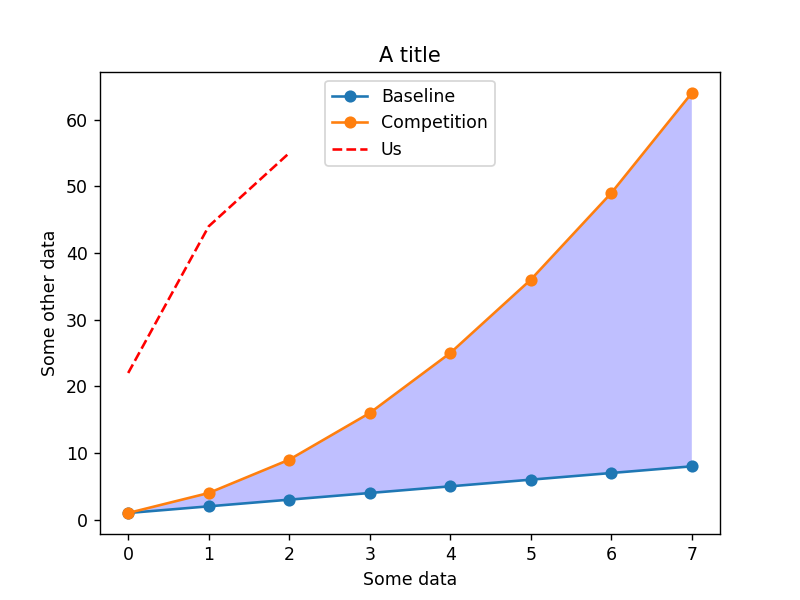

In [51]:
import numpy as np

linear_data = np.array([1,2,3,4,5,6,7,8])
exponential_data = linear_data**2

plt.figure()
# plot the linear data and the exponential data
plt.plot(linear_data, '-o', exponential_data, '-o')

In [52]:
# plot another series with a dashed red line
plt.plot([22,44,55], '--r')

In [53]:
plt.xlabel('Some data')
plt.ylabel('Some other data')
plt.title('A title')
# add a legend with legend entries (because we didn't have labels when we plotted the data series)
plt.legend(['Baseline', 'Competition', 'Us'])

In [54]:
# fill the area between the linear data and exponential data
plt.gca().fill_between(range(len(linear_data)), 
                       linear_data, exponential_data, 
                       facecolor='blue', 
                       alpha=0.25)

Let's try working with dates!

<IPython.core.display.Javascript object>


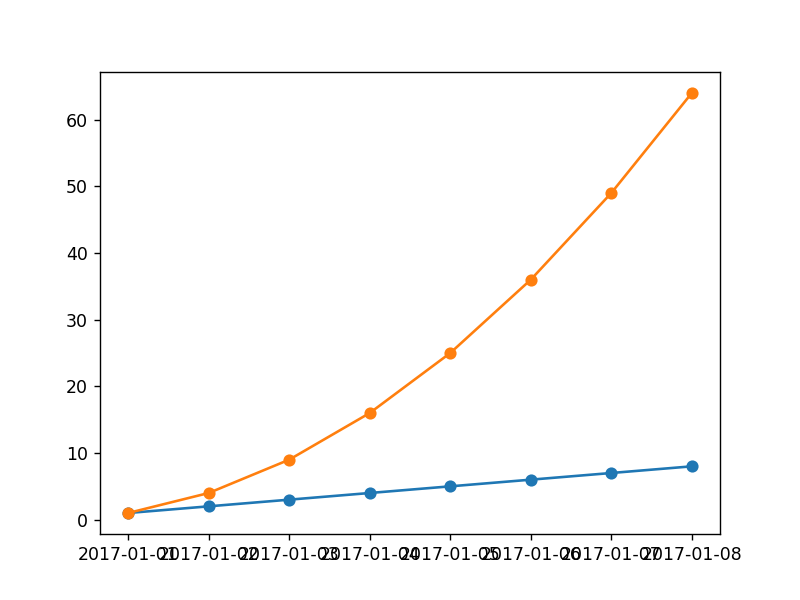

In [55]:
plt.figure()

observation_dates = np.arange('2017-01-01', '2017-01-09', dtype='datetime64[D]')

plt.plot(observation_dates, linear_data, '-o',  observation_dates, exponential_data, '-o')

Let's try using pandas

In [56]:
import pandas as pd
"""
plt.figure()
observation_dates = np.arange('2017-01-01', '2017-01-09', dtype='datetime64[D]')
observation_dates = map(pd.to_datetime, observation_dates) # trying to plot a map will result in an error
plt.plot(observation_dates, linear_data, '-o',  observation_dates, exponential_data, '-o')
"""

"\nplt.figure()\nobservation_dates = np.arange('2017-01-01', '2017-01-09', dtype='datetime64[D]')\nobservation_dates = map(pd.to_datetime, observation_dates) # trying to plot a map will result in an error\nplt.plot(observation_dates, linear_data, '-o',  observation_dates, exponential_data, '-o')\n"

<IPython.core.display.Javascript object>


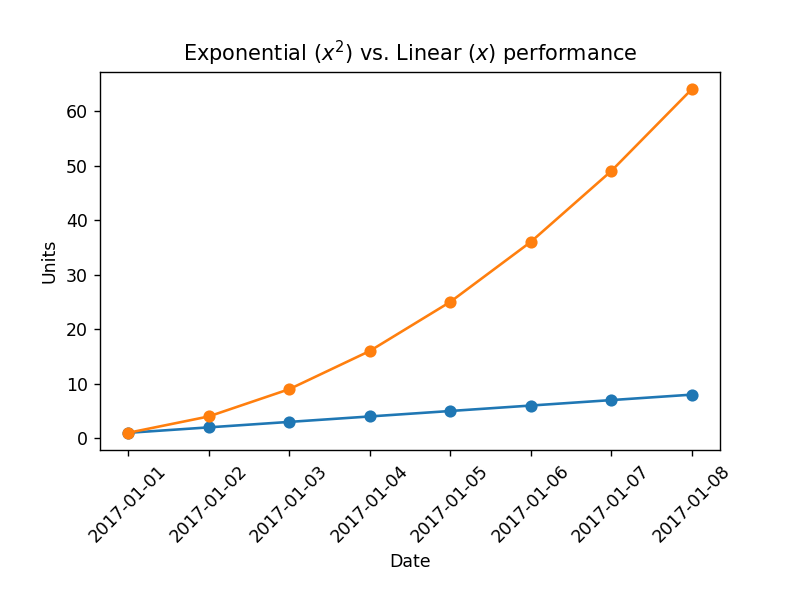

In [57]:
plt.figure()
observation_dates = np.arange('2017-01-01', '2017-01-09', dtype='datetime64[D]')
observation_dates = list(map(pd.to_datetime, observation_dates)) # convert the map to a list to get rid of the error
plt.plot(observation_dates, linear_data, '-o',  observation_dates, exponential_data, '-o')

In [58]:
x = plt.gca().xaxis

# rotate the tick labels for the x axis
for item in x.get_ticklabels():
    item.set_rotation(45)

In [59]:
# adjust the subplot so the text doesn't run off the image
plt.subplots_adjust(bottom=0.25)

In [60]:
ax = plt.gca()
ax.set_xlabel('Date')
ax.set_ylabel('Units')
ax.set_title('Exponential vs. Linear performance')

In [61]:
# you can add mathematical expressions in any text element
ax.set_title("Exponential ($x^2$) vs. Linear ($x$) performance")

# Bar Charts

<IPython.core.display.Javascript object>


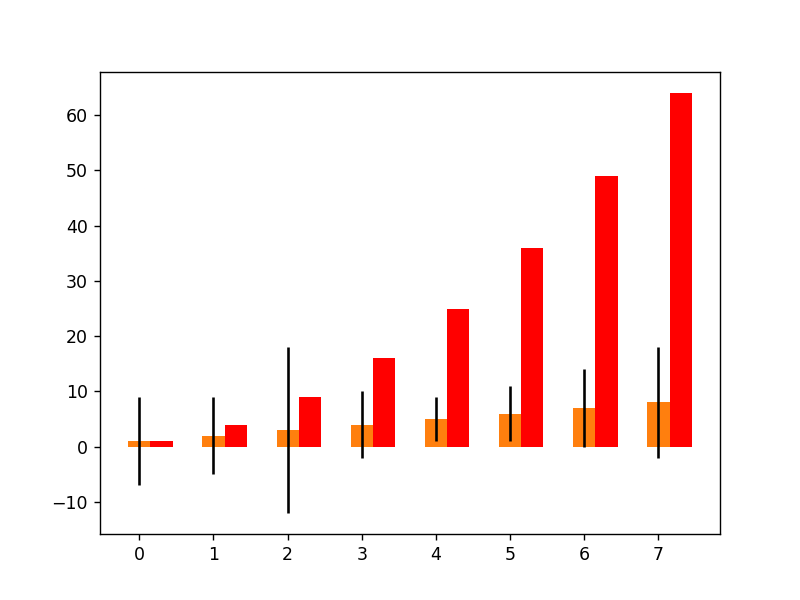

<Container object of 8 artists>

In [62]:
plt.figure()
xvals = range(len(linear_data))
plt.bar(xvals, linear_data, width = 0.3)

In [63]:
new_xvals = []

# plot another set of bars, adjusting the new xvals to make up for the first set of bars plotted
for item in xvals:
    new_xvals.append(item+0.3)

plt.bar(new_xvals, exponential_data, width = 0.3 ,color='red')

<Container object of 8 artists>

In [64]:
from random import randint
linear_err = [randint(0,15) for x in range(len(linear_data))] 

# This will plot a new set of bars with errorbars using the list of random error values
plt.bar(xvals, linear_data, width = 0.3, yerr=linear_err)

<Container object of 8 artists>

<IPython.core.display.Javascript object>


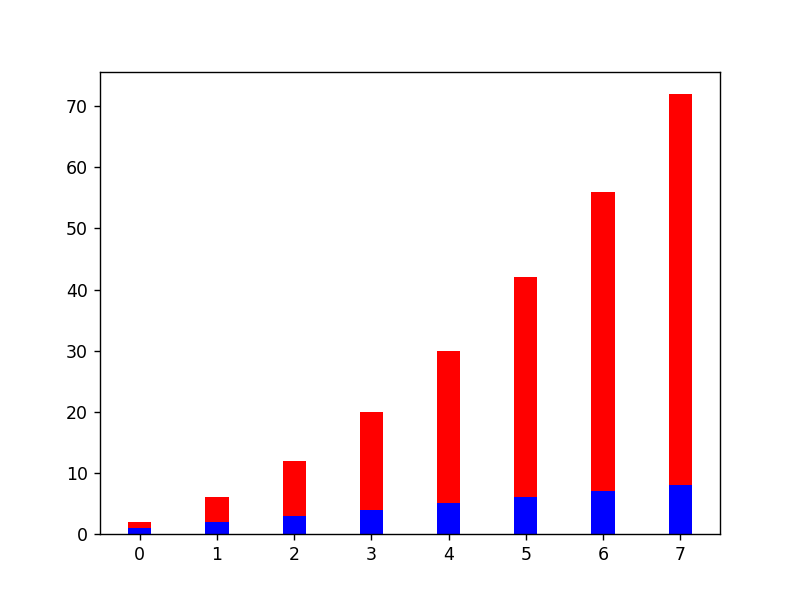

<Container object of 8 artists>

In [65]:
# stacked bar charts are also possible
plt.figure()
xvals = range(len(linear_data))
plt.bar(xvals, linear_data, width = 0.3, color='b')
plt.bar(xvals, exponential_data, width = 0.3, bottom=linear_data, color='r')

<IPython.core.display.Javascript object>


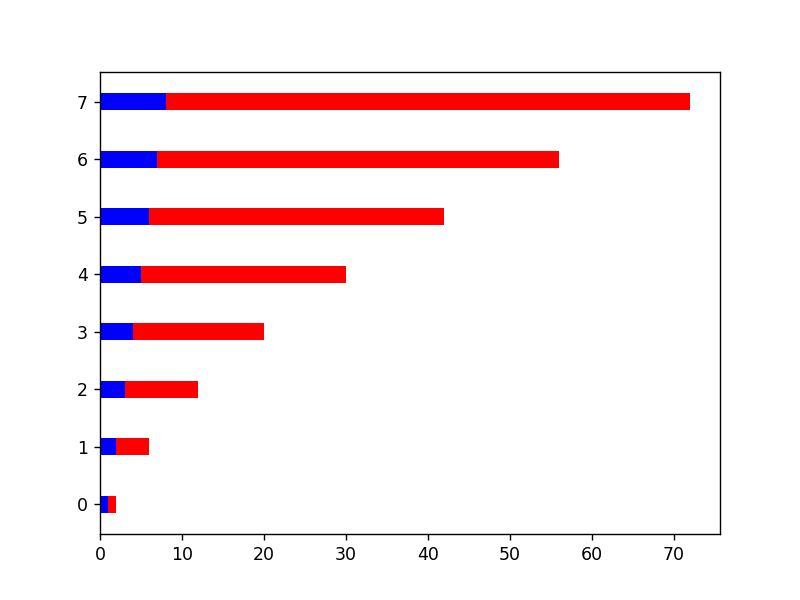

<Container object of 8 artists>

In [66]:
# or use barh for horizontal bar charts
plt.figure()
xvals = range(len(linear_data))
plt.barh(xvals, linear_data, height = 0.3, color='b')
plt.barh(xvals, exponential_data, height = 0.3, left=linear_data, color='r')